In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

In [84]:
c = "userid item_id rating ts".split()
df = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\Py_DS_ML_BC\\19-Recommender-Systems\\u.data", "\t", names = c)

In [85]:
df.head()


,userid,item_id,rating,ts
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [86]:
mt = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\Py_DS_ML_BC\\19-Recommender-Systems\\Movie_Id_Titles")

In [87]:
mt.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [88]:
df = pd.merge(mt,df,on = "item_id")

In [123]:
df.head()

,item_id,title,userid,rating,ts
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [94]:
ratingdf = df.groupby("item_id").mean().sort_values(by = "rating", ascending= False)
ratingdf.head()

,userid,rating,ts
item_id,,,
814,13.0,5.0,886302261.0
1599,437.0,5.0,880142614.0
1201,90.0,5.0,891383687.0
1122,60.0,5.0,883326498.0
1653,675.0,5.0,889489913.0


In [95]:
numratingdf = df.groupby(["title",'item_id']).count().sort_values(by = "rating", ascending= False)
numratingdf.head()

,,userid,rating,ts
title,item_id,,,
Star Wars (1977),50,584,584,584
Contact (1997),258,509,509,509
Fargo (1996),100,508,508,508
Return of the Jedi (1983),181,507,507,507
Liar Liar (1997),294,485,485,485


In [96]:
df2 = pd.merge(numratingdf,ratingdf, on = "item_id")

In [97]:
df2.head()

,userid_x,rating_x,ts_x,userid_y,rating_y,ts_y
item_id,,,,,,
50,584,584,584,470.577055,4.359589,8.830231e+08
258,509,509,509,461.699411,3.803536,8.840730e+08
100,508,508,508,455.681102,4.155512,8.827515e+08
181,507,507,507,474.990138,4.007890,8.827384e+08
294,485,485,485,471.680412,3.156701,8.834125e+08


In [102]:
df2.drop("userid_y", inplace = True, axis = 1)

In [103]:
df2 = pd.merge(df2,mt, on = "item_id")

In [106]:
df2.sort_values(ascending = False, by = "ts_x")

,item_id,ts_x,rating_y,title
0,50,584,4.359589,Star Wars (1977)
1,258,509,3.803536,Contact (1997)
2,100,508,4.155512,Fargo (1996)
3,181,507,4.007890,Return of the Jedi (1983)
4,294,485,3.156701,Liar Liar (1997)
...,...,...,...,...
1580,1568,1,1.000000,Vermont Is For Lovers (1992)
1579,830,1,1.000000,Power 98 (1995)
1578,1649,1,3.000000,"Big One, The (1997)"
1577,1627,1,3.000000,"Wife, The (1995)"


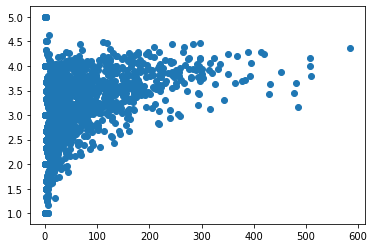

In [109]:
plt.scatter(df2["ts_x"], df2["rating_y"])

In [110]:
df2.head()

,item_id,ts_x,rating_y,title
0,50,584,4.359589,Star Wars (1977)
1,258,509,3.803536,Contact (1997)
2,100,508,4.155512,Fargo (1996)
3,181,507,4.007890,Return of the Jedi (1983)
4,294,485,3.156701,Liar Liar (1997)


In [116]:
df2.head()

,item_id,ts_x,rating_y
title,,,
Star Wars (1977),50,584,4.359589
Contact (1997),258,509,3.803536
Fargo (1996),100,508,4.155512
Return of the Jedi (1983),181,507,4.007890
Liar Liar (1997),294,485,3.156701


In [119]:
starwars = df2.loc['Star Wars (1977)'][:]

In [120]:
starwars

item_id      50.000000
ts_x        584.000000
rating_y      4.359589
Name: Star Wars (1977), dtype: float64

In [121]:
df2.corrwith(starwars)

item_id    NaN
ts_x       NaN
rating_y   NaN
dtype: float64

In [122]:
starwars.corr(df2)

nan

In [131]:
df1 = df.pivot_table(index = "userid", values = "rating", columns = "title")

In [126]:
df2.head()

,item_id,ts_x,rating_y
title,,,
Star Wars (1977),50,584,4.359589
Contact (1997),258,509,3.803536
Fargo (1996),100,508,4.155512
Return of the Jedi (1983),181,507,4.007890
Liar Liar (1997),294,485,3.156701


In [132]:
starwars = df1["Star Wars (1977)"]

In [137]:
liar = df1 ["Liar Liar (1997)"]

In [135]:
starwars_ = df1.corrwith(starwars)

In [138]:
liar_ = df1.corrwith(liar)

In [139]:
corr_starwars = pd.DataFrame(starwars_, columns = ["Correlate"])

In [142]:
corr_starwars = corr_starwars.join(df2)

In [143]:
corr_starwars.head()

,Correlate,item_id,ts_x,rating_y
title,,,,
'Til There Was You (1997),0.872872,1300,9,2.333333
1-900 (1994),-0.645497,1353,5,2.600000
101 Dalmatians (1996),0.211132,225,109,2.908257
12 Angry Men (1957),0.184289,178,125,4.344000
187 (1997),0.027398,330,41,3.024390


In [147]:
corr_starwars[corr_starwars['ts_x']>100].sort_values(by = "Correlate", ascending = False)

,Correlate,item_id,ts_x,rating_y
title,,,,
Star Wars (1977),1.000000,50,584,4.359589
"Empire Strikes Back, The (1980)",0.748353,172,368,4.206522
Return of the Jedi (1983),0.672556,181,507,4.007890
Raiders of the Lost Ark (1981),0.536117,174,420,4.252381
Austin Powers: International Man of Mystery (1997),0.377433,249,130,3.246154
...,...,...,...,...
"Edge, The (1997)",-0.127167,331,113,3.539823
As Good As It Gets (1997),-0.130466,316,112,4.196429
Crash (1996),-0.148507,325,128,2.546875
